1.Introduction

This assignment will help you to consolidate the concepts learnt in the session.

2.Problem Statement

In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:
Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes: >50K, <=50K.\
age: continuous.\
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.\
fnlwgt: continuous.\
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.\
education-num: continuous.\
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.\
occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.\
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,Unmarried.\
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.\
sex: Female, Male.\
capital-gain: continuous.\
capital-loss: continuous.\
hours-per-week: continuous.\
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El- Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

NOTE:The solution shared through Github should contain the source code used and the screen shot of the output.

3.Output
This assignment consists of 200 marks and has to be submitted in
.ipynb/PDF format in the upcoming session for evaluation.

In [1]:
#Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import seaborn as sns

#Model Tuning with Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve, cross_val_score
kfold = StratifiedKFold(n_splits=8)

"""train = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' ,skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status',
              'occupation','relationship', 'race', 'sex', 'capital_gain',
              'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train.columns = col_labels
test.columns = col_labels"""

'train = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)\ntest = pd.read_csv(\'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test\' ,skiprows = 1, header = None)\ncol_labels = [\'age\', \'workclass\', \'fnlwgt\', \'education\', \'education_num\',\'marital_status\',\n              \'occupation\',\'relationship\', \'race\', \'sex\', \'capital_gain\',\n              \'capital_loss\', \'hours_per_week\', \'native_country\', \'wage_class\']\ntrain.columns = col_labels\ntest.columns = col_labels'

In [2]:
df=pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
print(df.isnull().sum())
print(df.shape)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
(32561, 15)


In [4]:
#removing '?' containing rows
df = df[(df != '?').all(axis=1)]
#label the income objects as 0 and 1
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})
print(df.shape)

(30162, 15)


In [5]:
# Check duplicate data exist

check_dupes = df.duplicated().any() 
print("Are there any duplicated values in data? ",check_dupes)

if check_dupes:
    df = df.drop_duplicates()
else:
    print("There are not duplicated values in the dataset")
    
print(df.shape)

Are there any duplicated values in data?  True
(30139, 15)


##### So, after cleaning the dataset of missing and duped values, we have (30139, 15) dataset

In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States


In [7]:
print(X.education.nunique())
print(X.education.unique())

print("----------------------------------------------------------------------------")

print(X["education.num"].nunique())
print(X["education.num"].unique())

16
['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-voc' '1st-4th' '5th-6th' 'Assoc-acdm'
 '12th' '9th' 'Preschool']
----------------------------------------------------------------------------
16
[ 9  4 10  6 16 15 13 14  7 11  2  3 12  8  5  1]


In [8]:
print(X["marital.status"].nunique())
print(X["marital.status"].unique())

print("----------------------------------------------------------------------------")

print(X["relationship"].nunique())
print(X["relationship"].unique())

7
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
----------------------------------------------------------------------------
6
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']


**In this dataset , just by looking at the columns "education" and "education.num" we could say that they bot convey the same meaning. One just specifies the degree name, and the other specifies a numerical value for that degree. We could drop any one of these. Numerical data is preferrable so lets keep "education.num", and we can remove "education".**

The same could be said about "marital.status" and "relationship". Here, generally we could assume income levels for whether a person is married or not.

"relationship" indirectly conveys the same as "marital.status". Husband & wife indicates that the person is married while others like child indicate that the person is single. Hence, we can drop any one of these.

In [9]:
X.drop(labels=["education", "relationship"], axis=1, inplace=True)
X.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,9,Widowed,Exec-managerial,White,Female,0,4356,18,United-States
3,54,Private,140359,4,Divorced,Machine-op-inspct,White,Female,0,3900,40,United-States
4,41,Private,264663,10,Separated,Prof-specialty,White,Female,0,3900,40,United-States
5,34,Private,216864,9,Divorced,Other-service,White,Female,0,3770,45,United-States
6,38,Private,150601,6,Separated,Adm-clerical,White,Male,0,3770,40,United-States


In [10]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country'],
      dtype='object')

In [11]:
# OneHotEncoding the ordinal variables
categorical_features=['workclass', 'marital.status',
       'occupation', 'race', 'sex','native.country']

In [12]:
X_cat=pd.get_dummies(X[categorical_features])
print("the shape of the original dataset",X[categorical_features].shape)
print("the shape of the encoded dataset",X_cat.shape)
print("We have ",X_cat.shape[1]- X[categorical_features].shape[1], 'new encoded features')

the shape of the original dataset (30139, 6)
the shape of the encoded dataset (30139, 76)
We have  70 new encoded features


In [13]:
X_cat.columns

Index(['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital.status_Divorced', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_W

In [14]:
X=X.join(X_cat)
X.drop(labels=['workclass', 'marital.status',
       'occupation', 'race', 'sex','native.country'], axis=1, inplace=True)
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,...,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
num_features=['age','fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week']
X[num_features].head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
1,82,132870,9,0,4356,18
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
5,34,216864,9,0,3770,45
6,38,150601,6,0,3770,40


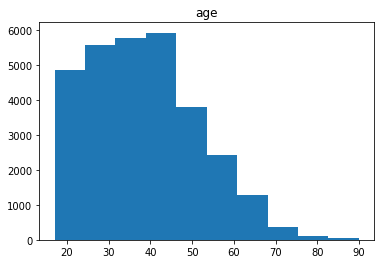

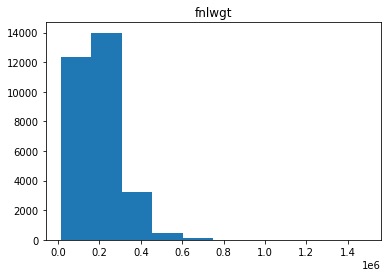

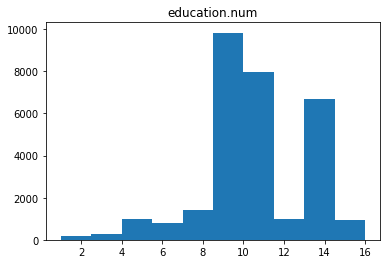

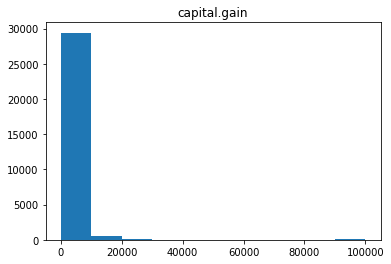

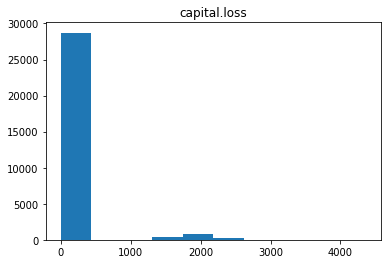

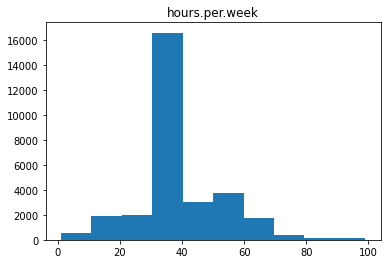

In [16]:
for i in X[num_features]:
    plt.hist(X[num_features][i])
    plt.title(i)
    plt.show()

## Taking care of Outliers

Age

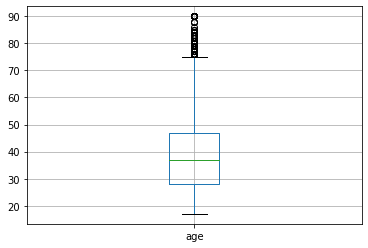

In [17]:
X[num_features].boxplot(column="age")

In [18]:
X[num_features]["age"].describe()

count    30139.000000
mean        38.441720
std         13.131426
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [19]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=X[num_features]["age"].quantile(0.75)-X[num_features]["age"].quantile(0.25)
lower_bridge=X[num_features]["age"].quantile(0.25)-(IQR*1.5)
upper_bridge=X[num_features]["age"].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-0.5
75.5


(None, None)

In [20]:
X.loc[X[num_features]["age"]>=76,'age']=76

fnlwgt

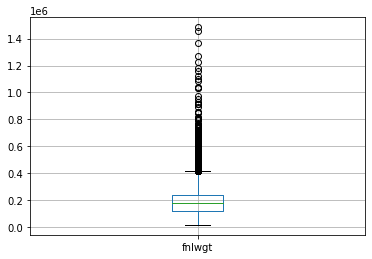

In [21]:
X[num_features].boxplot(column="fnlwgt")

In [22]:
X[num_features]["fnlwgt"].describe()

count    3.013900e+04
mean     1.897950e+05
std      1.056586e+05
min      1.376900e+04
25%      1.176275e+05
50%      1.784170e+05
75%      2.376045e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [23]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=X[num_features]["fnlwgt"].quantile(0.75)-X[num_features]["fnlwgt"].quantile(0.25)
lower_bridge=X[num_features]["fnlwgt"].quantile(0.25)-(IQR*1.5)
upper_bridge=X[num_features]["fnlwgt"].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-62338.0
417570.0


(None, None)

In [24]:
X.loc[X[num_features]["fnlwgt"]>=417570,'fnlwgt']=417570

education.num

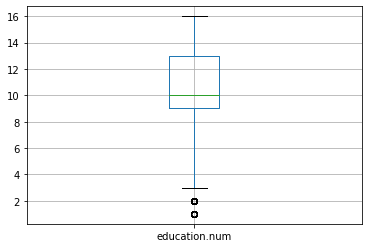

In [25]:
X[num_features].boxplot(column="education.num")

In [26]:
X[num_features]["education.num"].describe()

count    30139.000000
mean        10.122532
std          2.548738
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education.num, dtype: float64

In [27]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=X[num_features]["education.num"].quantile(0.75)-X[num_features]["education.num"].quantile(0.25)
lower_bridge=X[num_features]["education.num"].quantile(0.25)-(IQR*1.5)
upper_bridge=X[num_features]["education.num"].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

3.0
19.0


(None, None)

In [28]:
X.loc[X[num_features]["education.num"]<=3,'education.num']=3

capital.gain, capital.loss, hours.per.week -> No need

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


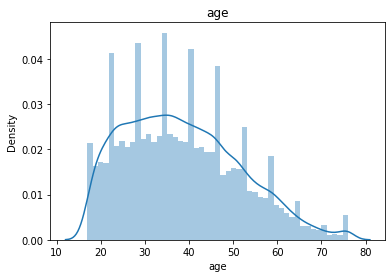

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


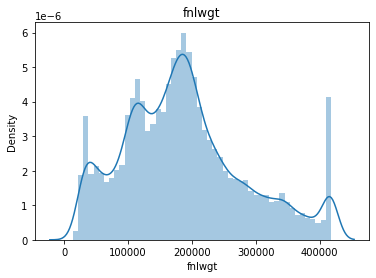

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


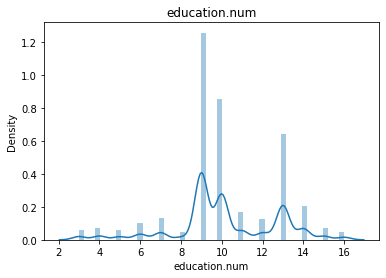

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


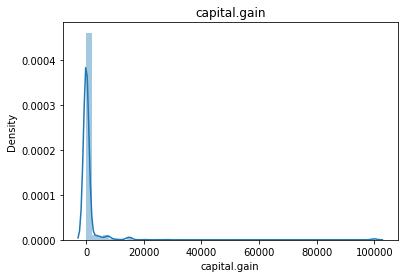

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


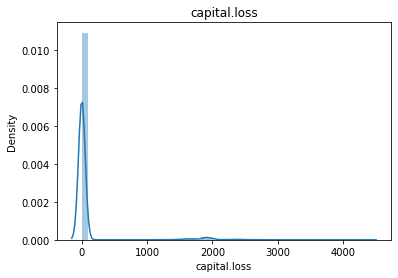

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


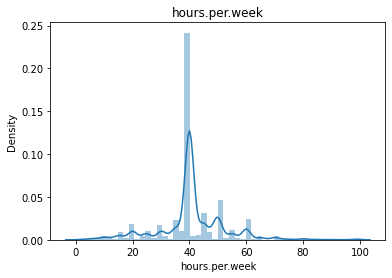

In [29]:
for i in X[num_features]:
    sns.distplot(X[num_features][i])
    plt.title(i)
    plt.show()

## Log transform skewed numeric features

In [30]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [31]:
# Skew and kurt
print("Skewness: %f" % X["age"].skew())
print("Kurtosis: %f" % X["age"].kurt())

# log(1+x) transform
X["age"] = np.log1p(X["age"])

print("Skewness: %f" % X["age"].skew())
print("Kurtosis: %f" % X["age"].kurt())

Skewness: 0.472896
Kurtosis: -0.391109
Skewness: -0.155380
Kurtosis: -0.764585


In [32]:
# Skew and kurt
print("Skewness: %f" % X["fnlwgt"].skew())
print("Kurtosis: %f" % X["fnlwgt"].kurt())

# log(1+x) transform
X["fnlwgt"] = np.log1p(X["fnlwgt"])

print("Skewness: %f" % X["fnlwgt"].skew())
print("Kurtosis: %f" % X["fnlwgt"].kurt())

Skewness: 0.553004
Kurtosis: -0.122052
Skewness: -0.949917
Kurtosis: 0.794959


In [33]:
# Skew and kurt
print("Skewness: %f" % X["education.num"].skew())
print("Kurtosis: %f" % X["education.num"].kurt())

# log(1+x) transform
X["education.num"] = np.log1p(X["education.num"])

print("Skewness: %f" % X["education.num"].skew())
print("Kurtosis: %f" % X["education.num"].kurt())

Skewness: -0.231244
Kurtosis: 0.409989
Skewness: -1.347401
Kurtosis: 3.192750


In [34]:
# Skew and kurt
print("Skewness: %f" % X["hours.per.week"].skew())
print("Kurtosis: %f" % X["hours.per.week"].kurt())

# log(1+x) transform
X["hours.per.week"] = np.log1p(X["fnlwgt"])

print("Skewness: %f" % X["hours.per.week"].skew())
print("Kurtosis: %f" % X["hours.per.week"].kurt())

Skewness: 0.332386
Kurtosis: 3.169360
Skewness: -1.090981
Kurtosis: 1.127555


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


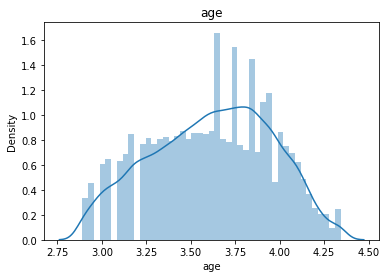

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


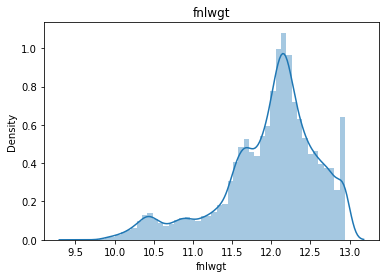

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


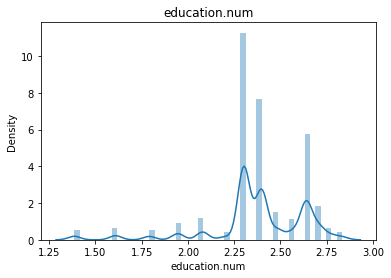

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


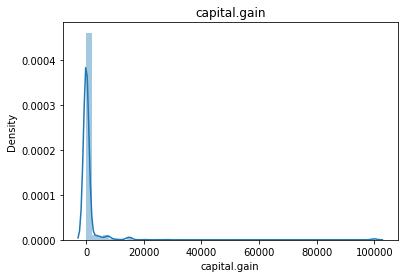

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


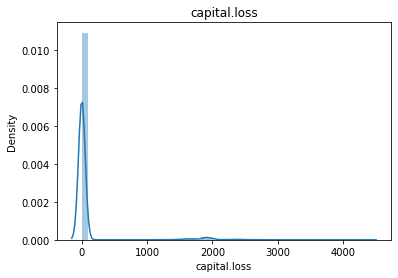

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


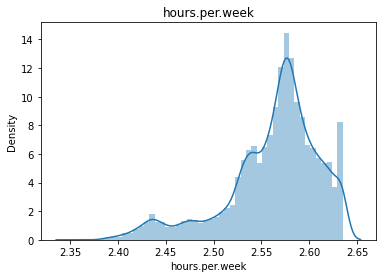

In [35]:
for i in X[num_features]:
    sns.distplot(X[num_features][i])
    plt.title(i)
    plt.show()

In [36]:
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,...,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,4.343805,11.797134,2.302585,0,4356,2.549221,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4.007333,11.851966,1.609438,0,3900,2.553497,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3.737670,12.486216,2.397895,0,3900,2.601668,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,3.555348,12.287030,2.302585,0,3770,2.586788,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,3.663562,11.922396,1.945910,0,3770,2.558962,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Model Training and Validation

In [37]:
X=X.values
X

array([[ 4.34380542, 11.79713401,  2.30258509, ...,  1.        ,
         0.        ,  0.        ],
       [ 4.00733319, 11.85196583,  1.60943791, ...,  1.        ,
         0.        ,  0.        ],
       [ 3.73766962, 12.48621638,  2.39789527, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 3.71357207, 11.94713999,  2.30258509, ...,  1.        ,
         0.        ,  0.        ],
       [ 4.07753744, 11.9310501 ,  2.30258509, ...,  1.        ,
         0.        ,  0.        ],
       [ 3.13549422, 12.21349999,  2.30258509, ...,  1.        ,
         0.        ,  0.        ]])

In [38]:
y=y.values
y

array([0, 0, 0, ..., 1, 0, 0])

In [39]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(21097, 82)
(9042, 82)


In [40]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

#### RANDOM FOREST CLASSIFIER

In [41]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

print("Random Forest r2 Score on Training set is",round(rf.score(X_train, y_train)*100,2))
print("Random Forest r2 Score on Test Set is",round(rf.score(X_test, y_test)*100,2))

accuracies = cross_val_score(rf, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred)*100, 2))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Random Forest r2 Score on Training set is 99.97
Random Forest r2 Score on Test Set is 85.3
[0.84761183 0.8407281  0.84338263 0.84262419 0.85362154 0.85362154
 0.84338263 0.83693591]
Accuracy: 84.52 %
Standard Deviation: 0.56 %
DecisionTrees's Accuracy:  85.3
[[6266  488]
 [ 841 1447]]


We can try to explore how much better our Random Forest model is after Hyperparameter Optimization. But, in this project I am concerned with XGB algorithm and how much is it better than Random Forest in terms of model performance and accuracy.

#### XGB CLASSIFIER

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =0)
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)

print("Random Forest r2 Score on Training set is",round(xgb.score(X_train, y_train)*100,2))
print("Random Forest r2 Score on Test Set is",round(xgb.score(X_test, y_test)*100,2))

accuracies = cross_val_score(xgb, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred)*100, 2))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Random Forest r2 Score on Training set is 86.26
Random Forest r2 Score on Test Set is 85.95
[0.8631539  0.85324232 0.85968904 0.85855138 0.86386045 0.86120592
 0.86158513 0.85210466]
Accuracy: 85.92 %
Standard Deviation: 0.41 %
DecisionTrees's Accuracy:  85.95
[[6405  349]
 [ 921 1367]]


#### XGB algorithm, a type of Boosting algorithm performs better than Random Forest Bagging algorithm. Even without Hyperparameter Optimization, our default XGB classifier is performing better.

In [43]:
#Hyperparameter Optimization for XGBoost Classifier

"""xgb = XGBClassifier(random_state = 0)

param_grid = {
    'n_estimators': [20, 50, 100, 250,300,400, 500,600,700,1000],
    'colsample_bytree': [0.2, 0.5, 0.7,0.75, 0.8,0.85, 0.9, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2,2.5,3,4],
    'subsample': [0.5,0.55,0.6,0.65,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.05,0.1,0.2,0.3,0.5,0.6,0.7,0.9],
    'gamma':[0,.01,.1,.5,1,10,100],
    'min_child_weight':[0,.01,0.05,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

clf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 5, 
cv = kfold, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 8 folds for each of 5 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 11.3min finished
XGB
Best Score: 0.8611648924746484
Best Parameters: {'subsample': 0.5, 'sampling_method': 'uniform', 'reg_lambda': 2,
                  'reg_alpha': 0.5, 'n_estimators': 20, 'min_child_weight': 0.05, 'max_depth': 10,
                  'learning_rate': 0.2, 'gamma': 10, 'colsample_bytree': 0.85}"""

"xgb = XGBClassifier(random_state = 0)\n\nparam_grid = {\n    'n_estimators': [20, 50, 100, 250,300,400, 500,600,700,1000],\n    'colsample_bytree': [0.2, 0.5, 0.7,0.75, 0.8,0.85, 0.9, 1],\n    'max_depth': [2, 5, 10, 15, 20, 25, None],\n    'reg_alpha': [0, 0.5, 1],\n    'reg_lambda': [1, 1.5, 2,2.5,3,4],\n    'subsample': [0.5,0.55,0.6,0.65,0.7, 0.8, 0.9],\n    'learning_rate':[.01,0.05,0.1,0.2,0.3,0.5,0.6,0.7,0.9],\n    'gamma':[0,.01,.1,.5,1,10,100],\n    'min_child_weight':[0,.01,0.05,0.1,1,10,100],\n    'sampling_method': ['uniform', 'gradient_based']\n}\n\nclf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 5, \ncv = kfold, verbose = True, n_jobs = -1)\nbest_clf_xgb = clf_xgb.fit(X_train,y_train)\nclf_performance(best_clf_xgb,'XGB')\n\nFitting 8 folds for each of 5 candidates, totalling 40 fits\n[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.\n[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 11.3min finished\nXGB\nBest Sc

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(subsample= 0.5, sampling_method= ['uniform'], reg_lambda= 2,
                    reg_alpha= 0.5, n_estimators= 20, min_child_weight= 0.05, 
                    max_depth= 10, learning_rate= 0.2, gamma= 10, colsample_bytree= 0.85)
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)

print("Random Forest r2 Score on Training set is",round(xgb.score(X_train, y_train)*100,2))
print("Random Forest r2 Score on Test Set is",round(xgb.score(X_test, y_test)*100,2))

accuracies = cross_val_score(xgb, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred)*100, 2))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Random Forest r2 Score on Training set is 86.48
Random Forest r2 Score on Test Set is 86.11
[0.86542835 0.85741373 0.85968904 0.86120592 0.86537732 0.86158513
 0.86234357 0.85627607]
Accuracy: 86.12 %
Standard Deviation: 0.31 %
DecisionTrees's Accuracy:  86.11
[[6391  363]
 [ 893 1395]]


#### There is a slight increase in model performnace and accuracy after performing the Hyperparameter Optimization. Still, further fine tuning can be achieved by increasing the iterations and by making use of GridSearchCV instead of RandomizedSearchCV